In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train_titanic.csv')

In [3]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

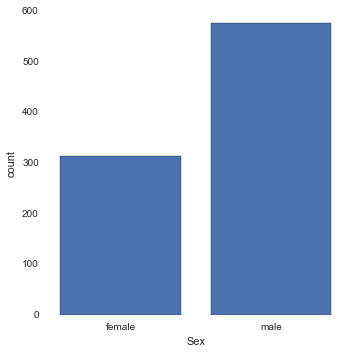

In [9]:
#factorplot allows you to pass a column argument and get a histogram
sns.factorplot('Sex',data=titanic_df)

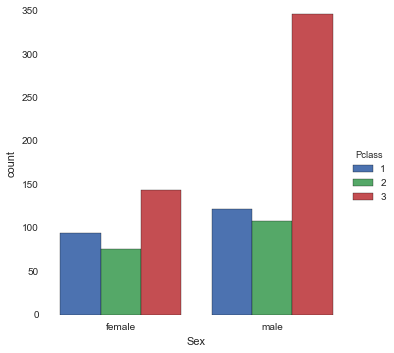

In [10]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass')

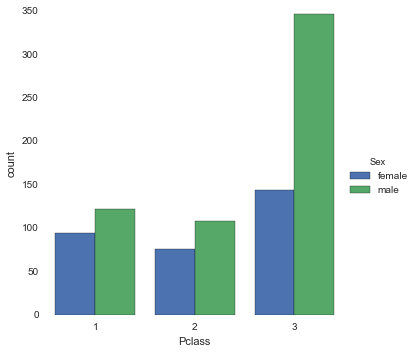

In [11]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex')
#theres's way more males in the third class than females

In [5]:
#we really want male, female, and children
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [6]:
#we're passing two columns from the data frame to pass into the function in order to create a new column
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


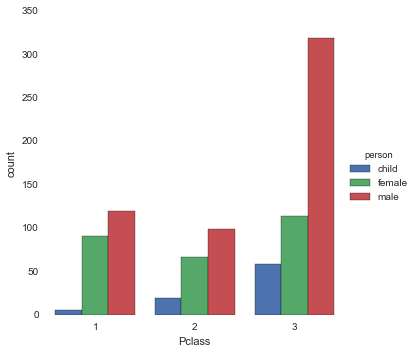

In [15]:
#did men, women and children really survive more on the Titanic?
sns.factorplot('Pclass',data=titanic_df,hue='person')
#allows us to separate the Pclass column by male, female, and children

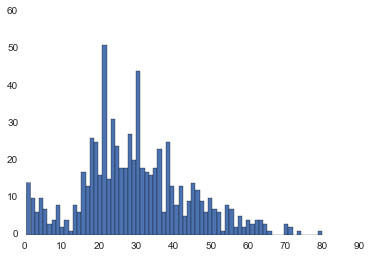

In [7]:
#create a distribution of the ages
titanic_df['Age'].hist(bins=70)

In [18]:
titanic_df['Age'].mean()

29.69911764705882

In [19]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

In [ ]:
#we can use a facet grid to see multiple KDE plots

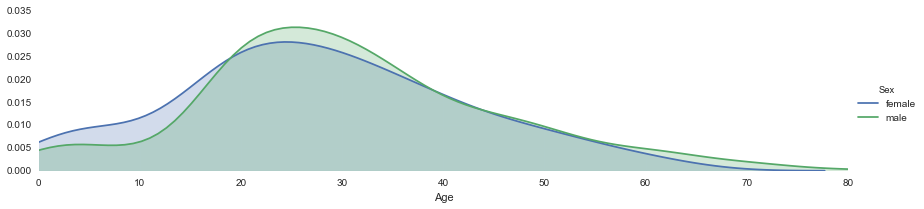

In [8]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
#setting aspect ratio = 4
fig.map(sns.kdeplot,'Age',shade=True)
#setting multiple kde plots
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

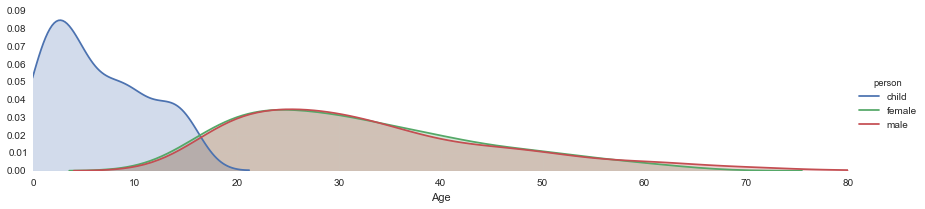

In [10]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
#setting aspect ratio = 4
fig.map(sns.kdeplot,'Age',shade=True)
#setting multiple kde plots
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
#because of the bandwidth, we still see the child going past 16 years old

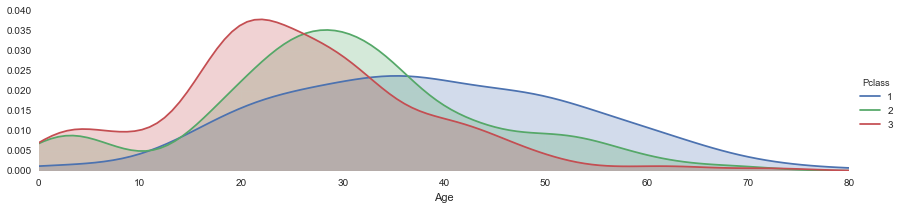

In [11]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
#setting aspect ratio = 4
fig.map(sns.kdeplot,'Age',shade=True)
#setting multiple kde plots
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [12]:
#what desk were the passengers on, and how does that relate to their class?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [14]:
#we need to drop the null values from the cabin column to populate an array only containing the not null values
deck = titanic_df['Cabin'].dropna()
#the cabin levels go from A to G

In [15]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

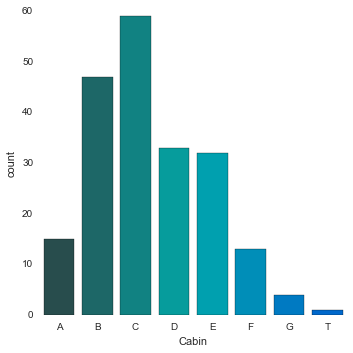

In [16]:
#grabbing the first letter from the cabin values to get their deck
levels = []

for level in deck:
    levels.append(level[0])
#once we have this information, we can make a factorplot from it
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
#we can set the color palette
sns.factorplot('Cabin',data=cabin_df,palette='winter_d')

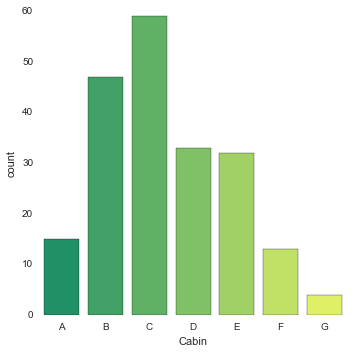

In [17]:
#remove the T row values
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#essentially a WHERE clause update
sns.factorplot('Cabin',data=cabin_df,palette='summer')

In [18]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


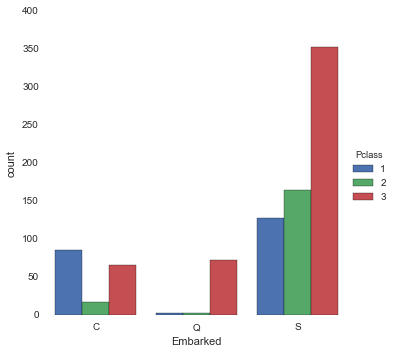

In [22]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',x_order=['C','Q','S'])
#see where people embarked from, and which class they belong to

In [23]:
#from Q, all of the passengers were third class. What are the economics of that town?
#Next up, who was alone and who was with family?
titanic_df.head()
#SibSp is number of siblings on board
#Parch means parents or childrenn on board for that person
#If both values are zero, then that person was alone

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [24]:
titanic_df['Alone'] = titanic_df.SibSp+titanic_df.Parch
#here we're adding the two columns togehter and setting the Alone column to that

In [25]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [27]:
#check if someone was alone
#takes the values from that column, and sets them equal to a string
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
#this warning is fine. It's just saying that we're doing an overwrite.
#It's interesting that you can take an integer column and just change it to a string
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


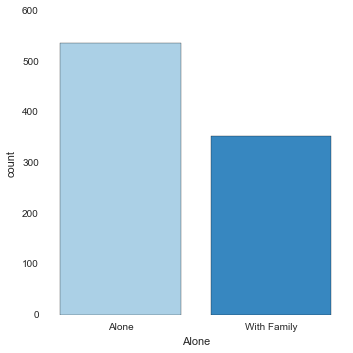

In [29]:
sns.factorplot('Alone',data=titanic_df,palette='Blues')

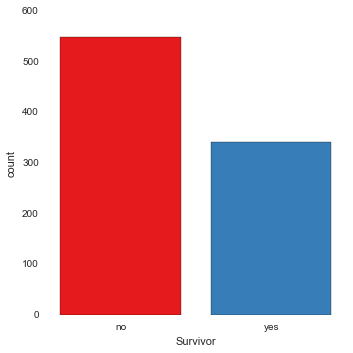

In [34]:
#now that we know more about the data, we can ask the question, what factors helped lead someone to survive?
#using a dictionary to map the Survived column to a new text column
#the map mechanism is essentially a CASE statement
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data=titanic_df,palette='Set1')


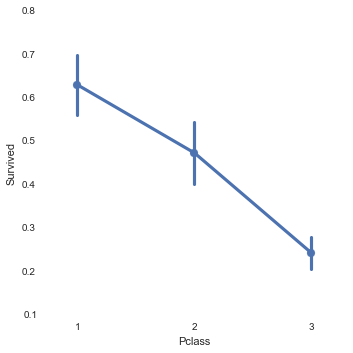

In [35]:
#was class a factor?
#The movie Titanic showed that third class passengers did not survive at the rate that 1st class passengers did
sns.factorplot('Pclass','Survived',data=titanic_df)
#which the data seems to show
#With "Women and Children" first, the third class had way more males

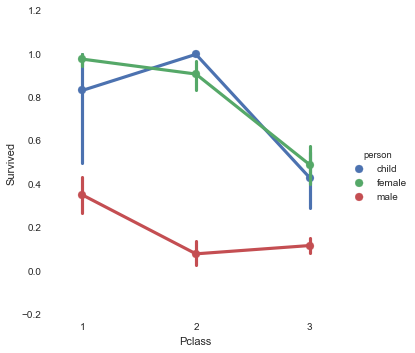

In [36]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')
#shows that being a male was pretty predictive on whether or not you survived

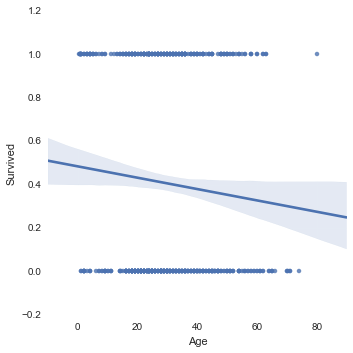

In [37]:
sns.lmplot('Age','Survived',data=titanic_df)
#you can see that general trend is that older the passenger, the less likely to survive

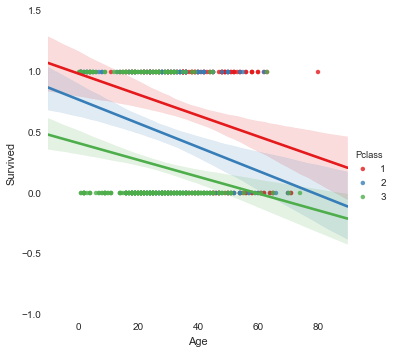

In [42]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='Set1')

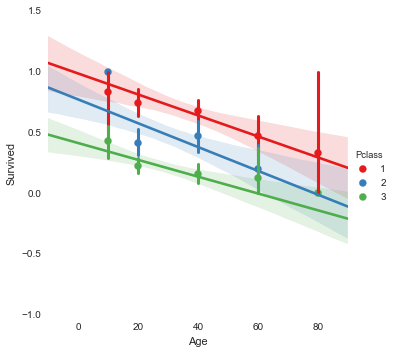

In [43]:
#we have a lot of data points, it would be nice to put the data in bins
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='Set1',x_bins=generations)
#really high std dev for older people in first class

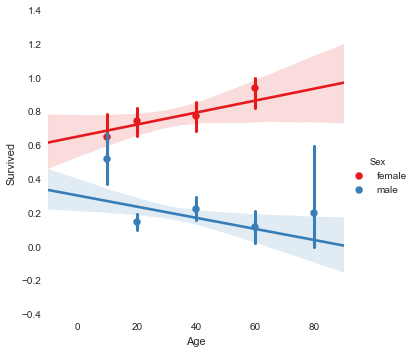

In [44]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='Set1',x_bins=generations)
#shows that older females had a stronger chance of surviving

In [ ]:
#Two additional questions:
#    1. Did the deck have an effect of the passengers survival rate? Did this answer match up with your intuition?
#    2. Did having a family member increase the odds of surviving the crash? Did they get lifeboats first? Does being worried about family
#affect chances of survival?

In [45]:
#Deck
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no


In [59]:
titanic_df['Deck'] = titanic_df['Cabin']
#cabin_df = cabin_df[cabin_df.Cabin != 'T']
#titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

In [65]:
titanic_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,C123
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,no,E46
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With Family,no,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With Family,yes,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With Family,yes,NaN


In [60]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
Alone          891 non-null object
Survivor       891 non-null object
Deck           204 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 118.3+ KB


In [63]:
decks = titanic_df['Deck'].loc[titanic_df['Deck']!=np.nan]

In [64]:
decks

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [54]:
#titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Deck'].loc[titanic_df['Deck']=='NaN'] = ''


In [56]:
titanic_df['Deck'] = titanic_df['Deck'][0]